In [1]:
import pandas as pd #importing and cleaning
import xarray as xr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #graphing
from scipy import stats
import cartopy.crs as ccrs 
import cartopy.feature as cfeature

# Comparing SST Changes and Harmful Algal Bloom Frequency

**Ethan Smith**   

OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->
  

As sea surface temperatures begin to shift, there are notable changes in ocean functions that are continuing to develop and cause negative effects on marine ecosystems. In order to understand and predict these trends, it is crucial to comprehend past norms in ocean data and compare them with data recently collected.Harmful Algal Blooms pose an increasingly significant threat to ocean ecosystems as the ocean's waters continue to change. For my project, i was curious to see how SSTs were changing in the Gulf of Mexico and if that change would have any significant affect on HAB Frequency. At the data collection stage of my project, i hypothesized that there would be a direct correlation between trends in SST in the Gulf and HAB Frequency around the Floridian Coast

## Data sources:
<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

- OISST SST Anomaly
  - Downloaded from Optimum Interpolation Sea Surface Temperature (OISST) via https://climatereanalyzer.org/ on 2024-11-15
  - Data collection process: Data collected by OISST 2.1, a culmination of sattelite, buoy, and ship data interpolated for estimation.
  - Relevant variables included: 
    - Water Temperature at surface depth (&deg;C)
  - Spatial coverage and resolution: (20–30°N, 82–98°W)
  - Conversion of JSON file to excel and CSV.
- Historical Harmful Algal Bloom Events 2000-2006
  - Downloaded from Florida Fish and Wildlife Conservation Commission on 2024-11-15
  - Data collection process: Onsight visual record.
  - Floridian coast/gulf area
- Historical Harmful Algal Bloom Events 2007-2014
  - Downloaded from Florida Fish and Wildlife Conservation Commission on 2024-11-15
  - Data collection process: Onsight visual record.
  - Floridian coast/gulf area
- Recent Harmful Algal (HAB) Bloom Events
  - Downloaded from Florida Fish and Wildlife Conservation Commission on 2024-11-15
  - Data collection process: Onsight visual record.
  - Floridian coast/gulf area

## 1. Analyzing Average Sea Surface Temperature Developement of the Gulf of Mexico



In this section, I import all necessary libraries for my entire project, as well as loading and displaying SST Anomaly data.

temps=pd.read_excel('tempdata.xlsx')

temps.to_csv('tempdata.csv', index=False)
temps['Date'] = pd.to_datetime(temps['Date'])

temps= temps[temps['Date']>='2005-01-01']

display(temps)

In [2]:
# load data file(s)
temps=pd.read_excel('tempdata.xlsx')
temps.to_csv('tempdata.csv', index=False)
temps['Date']=pd.to_datetime(temps['Date'])

# Problems: Converting from JSON. Ended up covnerting file to excel outside of python.

In [3]:
# perform data cleaning steps
temps= temps[temps['Date']>='2005-01-01'] #For data only after this date.

In [4]:
# perform data analysis
display(temps)

,Date,Temperature Anomaly(C*)
276,2005-01-15,0.384102
277,2005-02-15,0.093494
278,2005-03-15,-0.017820
279,2005-04-15,-0.266014
280,2005-05-15,-0.209585
...,...,...
507,2024-04-15,0.516672
508,2024-05-15,1.244404
509,2024-06-15,1.071436
510,2024-07-15,0.800039


0.00013096993395094616


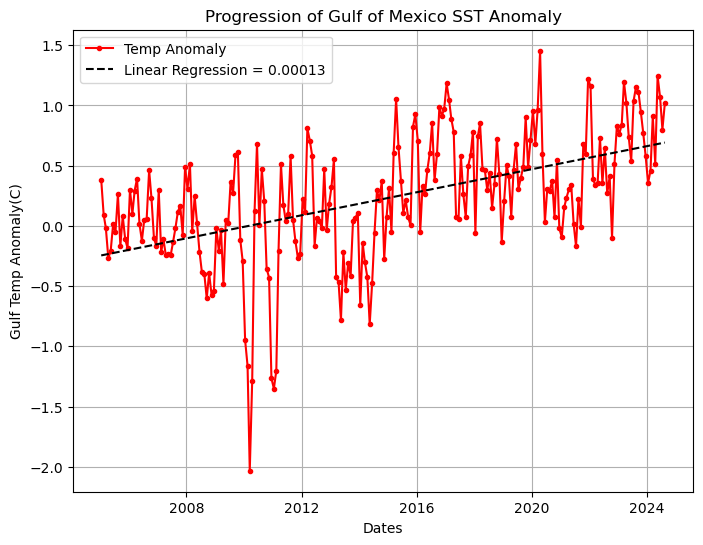

In [5]:
# make and display the first figure
fig, axs = plt.subplots(figsize=(8, 6))

x = temps['Date']  #Setting variables
y = temps['Temperature Anomaly(C*)']

xdig= (x- x.iloc[0]).dt.days #Converting back to numerical from datetime for graphing purposes.

axs.plot(x, y, color='red',marker='.')
axs.set_xlabel("Dates")
axs.set_ylabel("Gulf Temp Anomaly(C)")
axs.set_title("Progression of Gulf of Mexico SST Anomaly")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(xdig, y) #Linear regression

bfit = xdig*slope + intercept #Plotting linear regression.

axs.plot(x,bfit,'--',c="black")

print(slope)
plt.legend(["Temp Anomaly","Linear Regression = 0.00013"])
plt.grid()




<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 1 Caption:** This figure shows an increase in SST anomaly in the Gulf over the span of about two decades, indicating an overall warming trend

## 2. Analyzing Trends in HAB Frequency  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

In this section, data for the HABs is processed and analyzed as a figure.

habs1=pd.read_csv('Historic_Harmful_Algal_Bloom_Events_1990_-_1999.csv')
habs2=pd.read_csv('Historic_Harmful_Algal_Bloom_Events_2000_-_2006.csv')
habs3=pd.read_csv('Historic_Harmful_Algal_Bloom_Events_2007_-_2014.csv')
habs4=pd.read_csv('Recent_Harmful_Algal_Bloom_(HAB)_Events.csv')

newdf=[habs1, habs2, habs3, habs4]  

dfshabs=pd.concat(newdf, ignore_index=True)  

dfshabs.to_csv('Historic_Harmful_Algal_Blooms.csv', index=False)
dfshabs=dfshabs[(dfshabs['SAMPLE_DATE'] >= '2005-01-03') & (dfshabs['SAMPLE_DATE'] <= '2024-01-01')]

dfshabs=dfshabs.reset_index(drop=True)
dfshabs=dfshabs.drop(columns=['X','Y','HAB_ID','TIME',
                                'TIMEZONE','LOCATION','Shape','OBJECTID','NAME'])

dfshabs['SAMPLE_DATE'] = pd.to_datetime(dfshabs['SAMPLE_DATE'])
dfshabs.set_index('SAMPLE_DATE', inplace=True)

habs6month=dfshabs.resample('M',origin='2005-01-03').sum()

habs6month.reset_index(inplace=True)

habsfreq=dfshabs.resample('M',origin='2005-01-03').size()

habsfreq=habsfreq.reset_index(name='Frequency')

display(habs6month)

#display(habsfreq)


In [6]:
#Reading in individual file paths.
habs1=pd.read_csv('Historic_Harmful_Algal_Bloom_Events_1990_-_1999.csv')
habs2=pd.read_csv('Historic_Harmful_Algal_Bloom_Events_2000_-_2006.csv')
habs3=pd.read_csv('Historic_Harmful_Algal_Bloom_Events_2007_-_2014.csv')
habs4=pd.read_csv('Recent_Harmful_Algal_Bloom_(HAB)_Events.csv')

newdf=[habs1, habs2, habs3, habs4] #New array of these datasets 

dfshabs=pd.concat(newdf, ignore_index=True)  #Concatenating into one.

dfshabs.to_csv('Historic_Harmful_Algal_Blooms.csv', index=False) #Converting concatenated files into csv.
dfshabs=dfshabs[(dfshabs['SAMPLE_DATE'] >= '2005-01-03') & (dfshabs['SAMPLE_DATE'] <= '2024-01-01')] #Specifiying date range i wanted for data.

In [7]:
#Cleaning
dfshabs=dfshabs.reset_index(drop=True)
dfshabs=dfshabs.drop(columns=['X','Y','HAB_ID','TIME',
                                'TIMEZONE','LOCATION','Shape','OBJECTID','NAME'])  #Dropping unnecessary columns.

dfshabs['SAMPLE_DATE'] = pd.to_datetime(dfshabs['SAMPLE_DATE']) #Converting to datetime.
dfshabs.set_index('SAMPLE_DATE', inplace=True)

habs6month=dfshabs.resample('M',origin='2005-01-03').sum() #Resampled by month. Did this prior to deciding not to use cell count to to overwhelmin NaN values.

habs6month.reset_index(inplace=True)

habsfreq=dfshabs.resample('M',origin='2005-01-03').size() #Resampled again for month, but incoorporating frequency, as well via size()

habsfreq=habsfreq.reset_index(name='Frequency') #New column

In [8]:
display(habsfreq)

,SAMPLE_DATE,Frequency
0,2005-01-31 00:00:00+00:00,252
1,2005-02-28 00:00:00+00:00,222
2,2005-03-31 00:00:00+00:00,291
3,2005-04-30 00:00:00+00:00,271
4,2005-05-31 00:00:00+00:00,179
...,...,...
223,2023-08-31 00:00:00+00:00,927
224,2023-09-30 00:00:00+00:00,863
225,2023-10-31 00:00:00+00:00,843
226,2023-11-30 00:00:00+00:00,736


0.0747519473406013


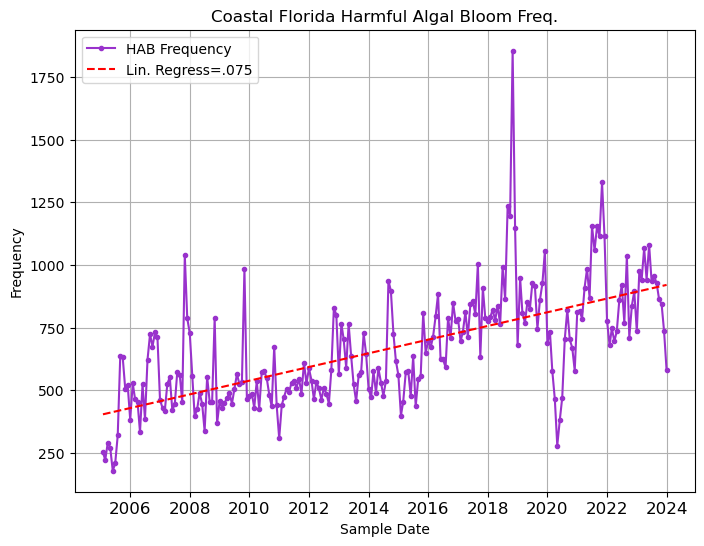

In [9]:
#Plotting

fig, axs = plt.subplots(figsize=(8, 6))

x = habsfreq['SAMPLE_DATE']
y = habsfreq['Frequency']


y2=temps['Temperature Anomaly(C*)']
axs.plot(x, y, color='darkorchid',marker='.')


axs.tick_params(axis='x', labelsize=12) 
axs.set_xlabel("Sample Date")
axs.set_ylabel("Frequency")
axs.set_title("Coastal Florida Harmful Algal Bloom Freq.")

xhabsdig= (habsfreq['SAMPLE_DATE']- habsfreq['SAMPLE_DATE'].iloc[0]).dt.days #Again, converting from datetime to numerical for graphing purposes.



slope, intercept, rvalue, pvalue, stderr = stats.linregress(xhabsdig, y) #Linear regression

print(slope) #Finding slope of the curve for legend label.

bfit = xhabsdig*slope + intercept #Creating the line of best fit.

plt.plot(x,bfit,'--',color="red")
axs.grid()
plt.legend(["HAB Frequency","Lin. Regress=.075"])

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 2 Caption:** This figure shows an upwards trend in HAB frequency from 2005-2024. It's relative slope is similar to that of SST.

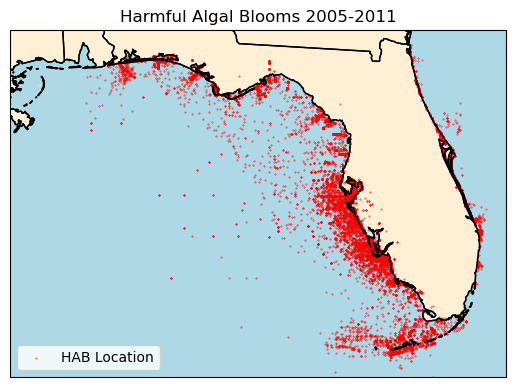

In [10]:
#Plotting
dfsearly=dfshabs[dfshabs.index<='2011-01-01'] #Setting date for following map plot.

lats1 = dfsearly['LATITUDE'] #Getting long and lat for the specified time period.
lons1= dfsearly['LONGITUDE']
#Cartopy and matplot
fig, axs = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
axs.set_extent([-89.5, -79.5, 24, 31], crs=ccrs.PlateCarree()) #Zooming in on map to specific window.
axs.coastlines(resolution='10m')
axs.add_feature(cfeature.BORDERS, linestyle=':')
axs.add_feature(cfeature.STATES, edgecolor='black')
#Plotting points and labeling
axs.scatter(lons1, lats1, color='red', s=0.1, transform=ccrs.PlateCarree(), label='HAB Location')
plt.title('Harmful Algal Blooms 2005-2011')
plt.legend()
axs.add_feature(cfeature.OCEAN, facecolor='lightblue')
axs.add_feature(cfeature.LAND, facecolor='papayawhip')
plt.grid()



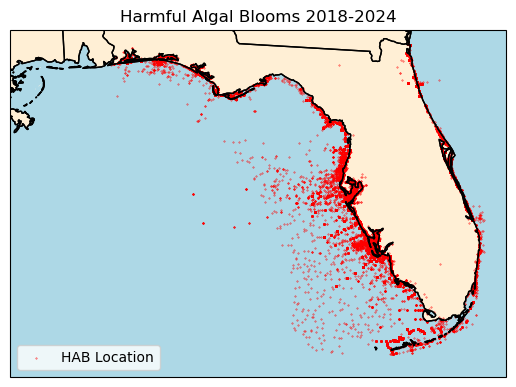

In [11]:
#Identical process from cell above.

dfslate=dfshabs[dfshabs.index>='2018-01-01']

lats2 = dfslate['LATITUDE']
lons2= dfslate['LONGITUDE']

fig, axs = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
axs.set_extent([-89.5, -79.5, 24, 31], crs=ccrs.PlateCarree())
axs.coastlines(resolution='10m')
axs.add_feature(cfeature.BORDERS, linestyle=':')
axs.add_feature(cfeature.STATES, edgecolor='black')

axs.scatter(lons2, lats2, color='red', s=0.1, transform=ccrs.PlateCarree(), label='HAB Location')
plt.title('Harmful Algal Blooms 2018-2024')
plt.legend()
axs.add_feature(cfeature.OCEAN, facecolor='lightblue')
axs.add_feature(cfeature.LAND, facecolor='papayawhip')
plt.grid()


print()

**Figure 3 Caption:** The two figures above show where each instance of HAB collected lay alongside Florida. Surprisingly, the map from 2005-2011 appears to have a greater number of points. This doesn't represent the data accurately, as 2018-2024 has a mucher higher HAB frequency.

## Discussion
**Interpretation of Results:**  
Both datasets show a significant and notable increasing trend based on their respective linear regression models. As predicted, there is a positive correlation between SST increases in the Gulf of Mexico and HAB Frequency around the coast of Florida. Looking towards the future datasets such as these can be used to predict HAB Frequency in months and years to come.

**Limitations and Future Work:**  
Unfortunately, the dataset used for HAB occurences likely lacks accuracy. It is based off of human onsite observations. Over such a large area as the entire coast of florida and many miles offshore, it wouldn't be surprising if some datapoints were missing. Just before presenting, i found a dataset for HAB that would have been much more accurate and provided more information on the HAB occurances, such as cell count. That additional info would've provided a definite conclusion to the scientific conclusion, as it would provide a look at the true magnitude of each occurence. If i were to continue this research, i would take more time looking for the best datasets to use.

## References  


1. “For Information on States of Emergency Declared during the 2024 Hurricane Season.” HABs: Harmful Algae Blooms | Florida Department of Health, www.floridahealth.gov/environmental-health/aquatic-toxins/harmful-algae-blooms/index.html. Accessed 6 Dec. 2024. 

3. Climate Change Institute, University of Maine. “Monthly Sea Surface Temperature.” Climate Reanalyzer, climatereanalyzer.org/clim/sst_monthly/?dm_id=world_60s-60n&var_id=sstanom. Accessed 6 Dec. 2024. 

4. Florida Fish and Wildlife Conservation Commission, geodata.myfwc.com/search?collection=dataset&q=Historic+Harmful+Algal+Bloom+Events+. Accessed 6 Dec. 2024. 

